Section: First steps with scikit-learn
--------------------------------------------------
Class labels: [0 1 2]
Section: Dealing with the nonlinearlyseparable case using slack variables
--------------------------------------------------


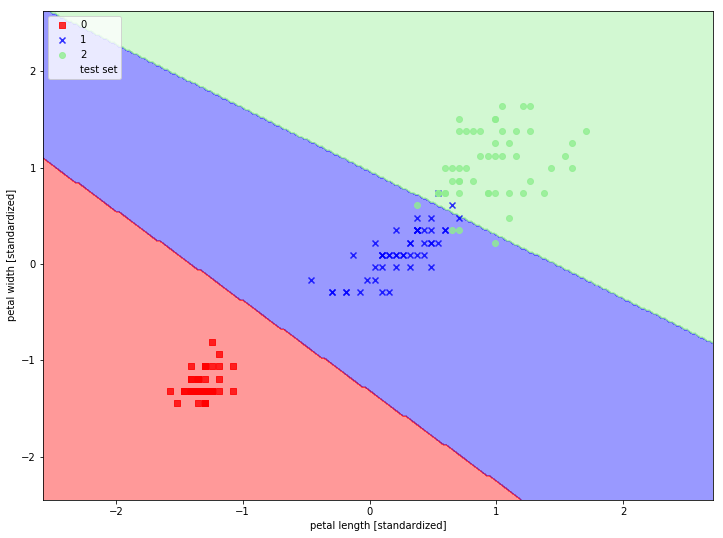

In [2]:

import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

# for sklearn 0.18's alternative syntax
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
if Version(sklearn_version) < '0.18':
    from sklearn.grid_search import train_test_split
else:
    from sklearn.model_selection import train_test_split

#############################################################################
print(50 * '=')
print('Section: First steps with scikit-learn')
print(50 * '-')

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
fig = plt.gcf()
fig.set_size_inches(12, 9)

def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')


X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

#############################################################################
print(50 * '=')
print('Section: Dealing with the nonlinearly'
      'separable case using slack variables')
print(50 * '-')

svm = SVC(kernel='linear', C=10.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

#############################################################################



Section: Using the kernel trick to find separating hyperplanesin higher dimensional space
--------------------------------------------------


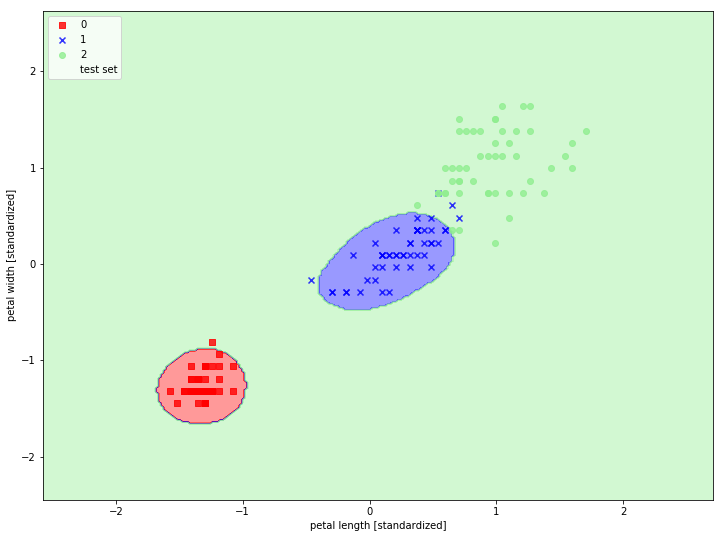

In [3]:
#############################################################################
print(50 * '=')
print('Section: Using the kernel trick to find separating hyperplanes'
      'in higher dimensional space')
print(50 * '-')


svm = SVC(kernel='rbf', random_state=0, gamma=10, C=0.10)
svm.fit(X_train_std, y_train)
fig = plt.gcf()
fig.set_size_inches(12, 9)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
# plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_iris_1.png', dpi=300)
plt.show()

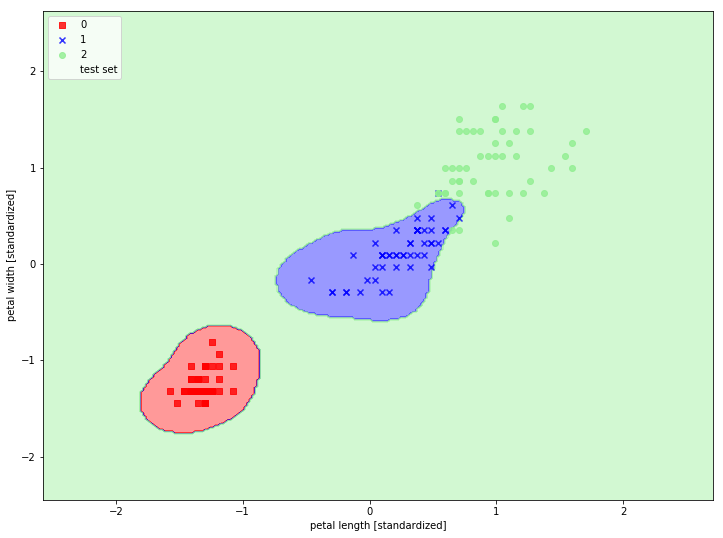

In [4]:
svm = SVC(kernel='rbf', random_state=0, gamma=10.0, C=10.0)
svm.fit(X_train_std, y_train)
fig = plt.gcf()
fig.set_size_inches(12, 9)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Section: Using the kernel trick to find separating hyperplanesin higher dimensional space. gamma parameter
--------------------------------------------------


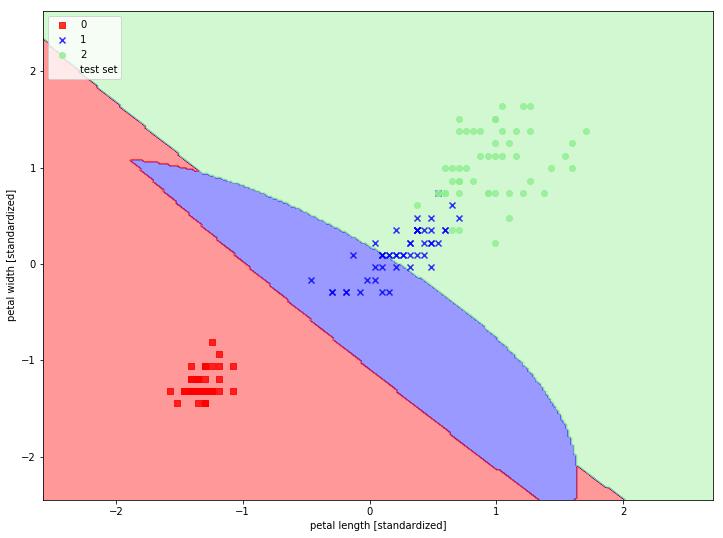

In [5]:
#############################################################################
print(50 * '=')
print('Section: Using the kernel trick to find separating hyperplanes'
      'in higher dimensional space. gamma parameter')
print(50 * '-')


svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=0.10)
svm.fit(X_train_std, y_train)
fig = plt.gcf()
fig.set_size_inches(12, 9)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()




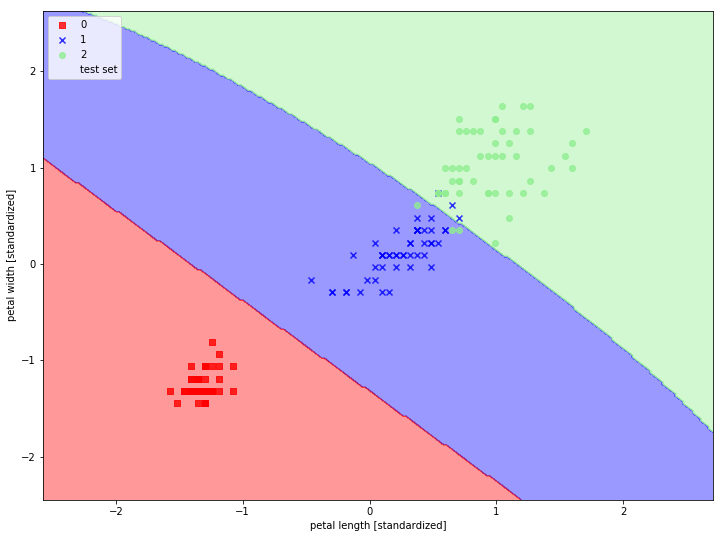

In [6]:
#############################################################################
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10)
svm.fit(X_train_std, y_train)
fig = plt.gcf()
fig.set_size_inches(12, 9)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

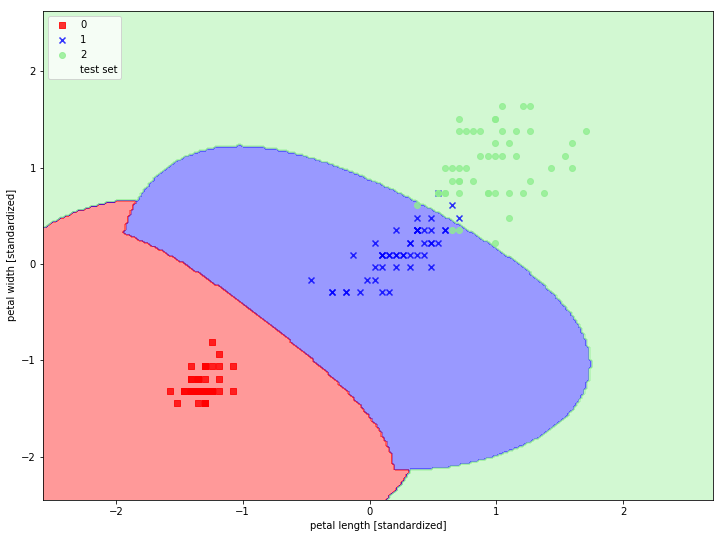

In [7]:
#####自己調參數
'''
套件官網說明http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

參數
C : float, optional (default=1.0)     懲罰參數
Penalty parameter C of the error term.

kernel : string, optional (default=’rbf’)
Specifies the kernel type to be used in the algorithm. It must be one of 
‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable.
If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute 
the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

degree : int, optional (default=3)
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma : float, optional (default=’auto’)
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is ‘auto’ then 1/n_features will be used instead.
'''

#svm = SVC(kernel='rbf',random_state=0, gamma=10.0, C=10.0)    # 老師精心調配
svm = SVC(kernel='rbf')  # 只選kernel  其他都用預設
svm.fit(X_train_std, y_train)
fig = plt.gcf()
fig.set_size_inches(12, 9)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()